In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
data=pd.read_excel("data/Politics_BD.xlsx")

In [4]:
data.head()

,District_Type,Region_ID,Education_Index,Income_Level,Media_Exposure,Campaign_Intensity,Citizen_Engagement,Support_Level
0,1,3,4,4,5,5,82,2
1,2,5,3,3,4,4,74,2
2,1,1,5,5,4,5,88,2
3,3,6,2,2,3,3,69,1
4,2,4,3,2,3,3,63,1


In [5]:
data.shape

(67, 8)

In [7]:
data.describe()

,District_Type,Region_ID,Education_Index,Income_Level,Media_Exposure,Campaign_Intensity,Citizen_Engagement,Support_Level
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2.000000,5.522388,2.820896,2.731343,3.149254,3.029851,64.701493,1.044776
std,0.816497,2.935458,1.369864,1.309431,1.234034,1.325395,19.977271,0.805903
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,0.000000
25%,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,47.000000,0.000000
50%,2.000000,6.000000,3.000000,3.000000,3.000000,3.000000,68.000000,1.000000
75%,3.000000,8.000000,4.000000,4.000000,4.000000,4.000000,79.500000,2.000000
max,3.000000,10.000000,5.000000,5.000000,5.000000,5.000000,95.000000,2.000000


In [9]:
X=data.iloc[:,0:7]
X.head()

,District_Type,Region_ID,Education_Index,Income_Level,Media_Exposure,Campaign_Intensity,Citizen_Engagement
0,1,3,4,4,5,5,82
1,2,5,3,3,4,4,74
2,1,1,5,5,4,5,88
3,3,6,2,2,3,3,69
4,2,4,3,2,3,3,63


In [10]:
Y=data.iloc[:,7:8]
Y.head()

,Support_Level
0,2
1,2
2,2
3,1
4,1


In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [13]:
X_train.head()

,District_Type,Region_ID,Education_Index,Income_Level,Media_Exposure,Campaign_Intensity,Citizen_Engagement
25,1,9,4,4,5,4,81
56,3,10,1,1,1,1,28
17,3,1,1,1,1,1,29
58,1,2,5,5,4,5,93
27,2,1,3,3,3,3,69


In [12]:
tree=DecisionTreeClassifier(max_depth=3)

In [14]:
tree.fit(X_train.values, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
tree_score=tree.score(X_test.values, Y_test)
tree_score

0.8571428571428571

In [18]:
Y_pred=tree.predict(X_test.values)

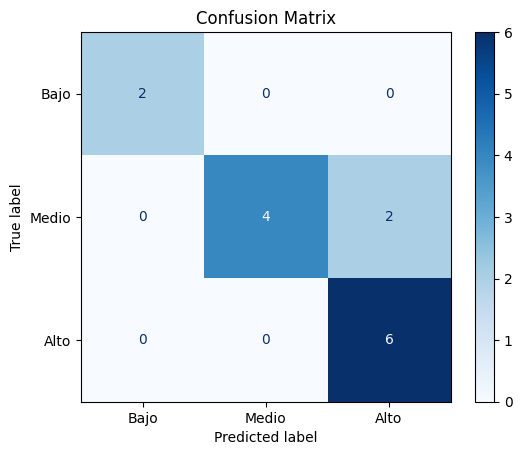

In [23]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bajo", "Medio", "Alto"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Cuántos registros se clasificaron correctamente como Medium (1): 4

Cuántos registros eran Medium pero se clasificaron incorrectamente como High (2): 2

Cuántos registros se clasificaron correctamente como High (2): 6

In [36]:
print(cm[0, :].sum())
print(cm[1, :].sum())
print(cm[2, :].sum())

2
6
6


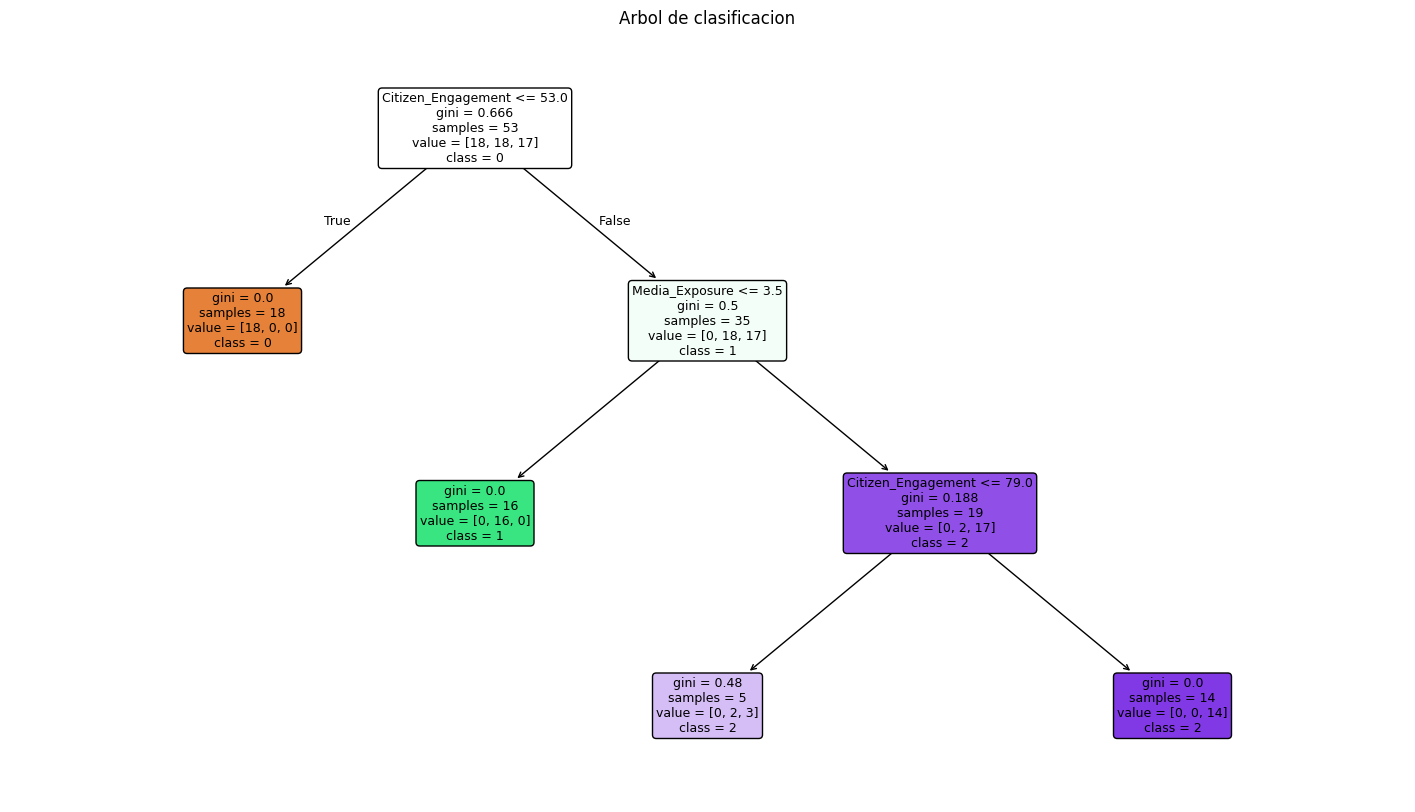

In [33]:
plt.figure(figsize=(18,10))
plot_tree(tree, feature_names=X.columns, class_names=["0", "1", "2"],filled=True, rounded=True, fontsize=9)
plt.title("Arbol de clasificacion")
plt.show()


In [34]:
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

Citizen_Engagement    0.577568
Media_Exposure        0.422432
District_Type         0.000000
Education_Index       0.000000
Region_ID             0.000000
Income_Level          0.000000
Campaign_Intensity    0.000000
dtype: float64

In [31]:
District_Type =1
Region_ID=1
Education_Index=5
Income_Level=5
Media_Exposure=4
Campaign_Intensity=5
Citizen_Engagement=88 
new_person=[District_Type, Region_ID, Education_Index, Income_Level, Media_Exposure,Campaign_Intensity,Citizen_Engagement]
pred=tree.predict([new_person])
print("Al ciudadano se le asigna la clase: ",pred)

Al ciudadano se le asigna la clase:  [2]
